In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the analytical solution


From the report we get 

$$k_n = \frac{(2n+1)\pi}{L}$$

$$\psi(x) = 2Acos(k_nx)$$

Here  $\psi(x)$ is a symmetrical even eigen function

$$k_n = \frac{(2n)\pi}{L}$$

$$\psi(x) = 2Asin(k_nx)$$

Here  $\psi(x)$ is a symmetrical odd eigen function

#### Sine harmonics

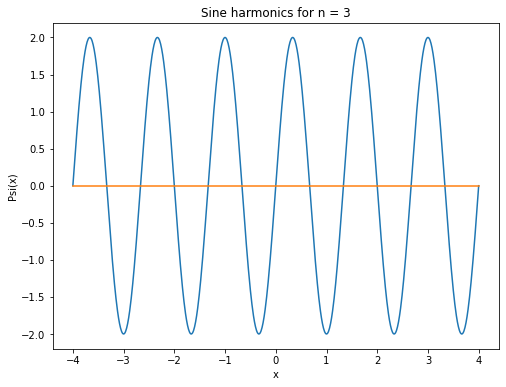

In [ ]:
x = np.linspace(-4, 4, 801)
L = 4
A = 1
n = 3

sin_harmonic_n = 2*n*np.pi/L
si_sin = 2*A*np.sin(sin_harmonic_n*x)

plt.figure(figsize=(8, 6))
plt.plot(x, si_sin)
plt.plot(x, [0]*len(x))
plt.xlabel('x')
plt.ylabel('Psi(x)')
plt.title('Sine harmonics for n = ' + str(n))

plt.show()

#### Cos harmonics

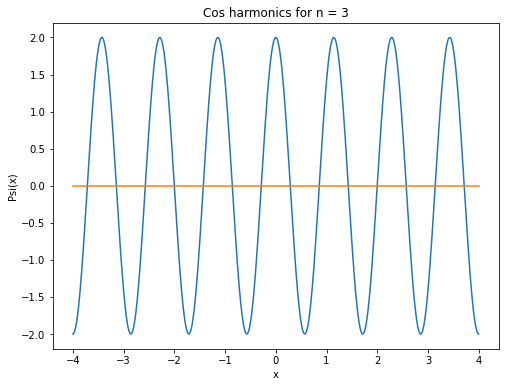

In [ ]:
x = np.linspace(-4, 4, 801)
L = 4
A = 1
n = 3

cos_harmonic_n=(2*n+1)*np.pi/L
si_cos = 2*A*np.cos(cos_harmonic_n*x)

plt.figure(figsize=(8, 6))
plt.plot(x, si_cos)
plt.plot(x, [0]*len(x))
plt.xlabel('x')
plt.ylabel('Psi(x)')
plt.title('Cos harmonics for n = ' + str(n))
plt.show()

#Infinite Square Well Problem

Conditions for Infinite square well Schrodinger's equation:
$$V(x) = 0,\:\:\: -L/2<x<L/2$$

$$V(x) = \infty\:\:\: elsewhere$$


Governing Equations for Infinite square well problem of Schrodinger wave equation:

$$\frac{d^2\psi}{dx^2} = -E\psi$$

Boundary Conditions:

$$\psi(\frac{+L}{2}) = \psi(\frac{-L}{2})=0$$

$$Let\:\:\:\: z = \frac{d\psi}{dx}$$

Eigenvalues (Energy) will be defined as:

$$\frac{dz}{dx} = -E\psi$$

We know that our solutions are symmetrical and therefore they must be in sinusodal form.

So we are considereing at x=0 either of the boundary consitions has to work depending on the value of E.

$$\psi(0) = 1 ,\:\:\:\frac{d\psi(0)}{dx} = 0 $$

$$\psi(0) = 0 ,\:\:\:\frac{d\psi(0)}{dx} = 1 $$


Here we are taking L = 4cm.


In [ ]:
#using first set of Initial conditions
x0 = 0
y0 = 1
y1= 0
x = 2      #this has to come from bisection
h = 0.01

In [ ]:
def dsi_dx(z):
  return z

def dz_dx(si, E):
  return (-E * si)

def rungeKutta(x0, y0, x, h, z, E):
  n = (int)((x - x0)/h)
  si = y0
  for i in range(1, n + 1):
    k1 = h * dsi_dx(z)
    l1 = h * dz_dx(si, E)
    k2 = h * dsi_dx(z + (l1/2.0))
    l2 = h * dz_dx(si + (k1/2.0), E)
    k3 = h * dsi_dx(z + (l2/2.0))
    l3 = h * dz_dx(si + (k2/2.0), E)
    k4 = h * dsi_dx(z + l3)
    l4 = h * dz_dx(si + k3, E)
        
    si = si + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
    z = z + (1.0 / 6.0)*(l1 + 2 * l2 + 2 * l3 + l4)
        
    x0 = x0 + h
  #print(si)
  return si

In [ ]:
#termination criteria for bisection Method
e = 10**-6

In [ ]:
def f(E):
  a=rungeKutta(x0, y0, x, h, y1, E)
  return a
#termination criteria
e = 10**-6
# note xr is xr_new
def Bisection(xl, xu , xr_old):
  xr=(xl + xu)/2
  a=f(xr)
  #print(xl,xu, xr,a)
  if (abs((xr - xr_old)/xr) < e):
    return xr
  if (f(xl)*f(xr) < 0):
    return Bisection(xl, xr, xr)
  elif (f(xl)*f(xr)>0):
    return Bisection(xr, xu, xr)
  else:
    if (f(xl)==0):
      return xl
    else:
      return xr

In [ ]:
# First Eigen value from Cos function
E=Bisection(0,1,0)
print(E)

0.6168503761291504


In [ ]:
#using second set of initial conditions
#using first set of Initial conditions
x0 = 0
y0 = 0
y1= 1
x = 2      #this has to come from bisection
h = 0.01

In [ ]:
#First Eigen value from sin function
E=Bisection(0,1,0)
print(E)

0.9999990463256836


In [ ]:
E_vals_inf = []
for i in range(0, 50):
  xl=i
  xr=i+1
  x0 = 0
  y0 = 1
  y1= 0
  x = 2      #this has to come from bisection
  h = 0.01
  if (f(xl)*f(xr)<0):
    E=Bisection(xl,xr,0)
    E_vals_inf.append(E)
    print("Cos", str(E))
  y0 = 0
  y1 = 1
  if(f(xl)*f(xr)<0):
    E=Bisection(xl,xr, 0)
    E_vals_inf.append(E)
    print("sin",str(E))

Cos 0.6168503761291504
sin 2.4674015045166016
Cos 5.551654815673828
sin 9.869606018066406
Cos 15.421249389648438
sin 22.206619262695312
Cos 30.225662231445312
sin 39.478424072265625
Cos 49.964874267578125


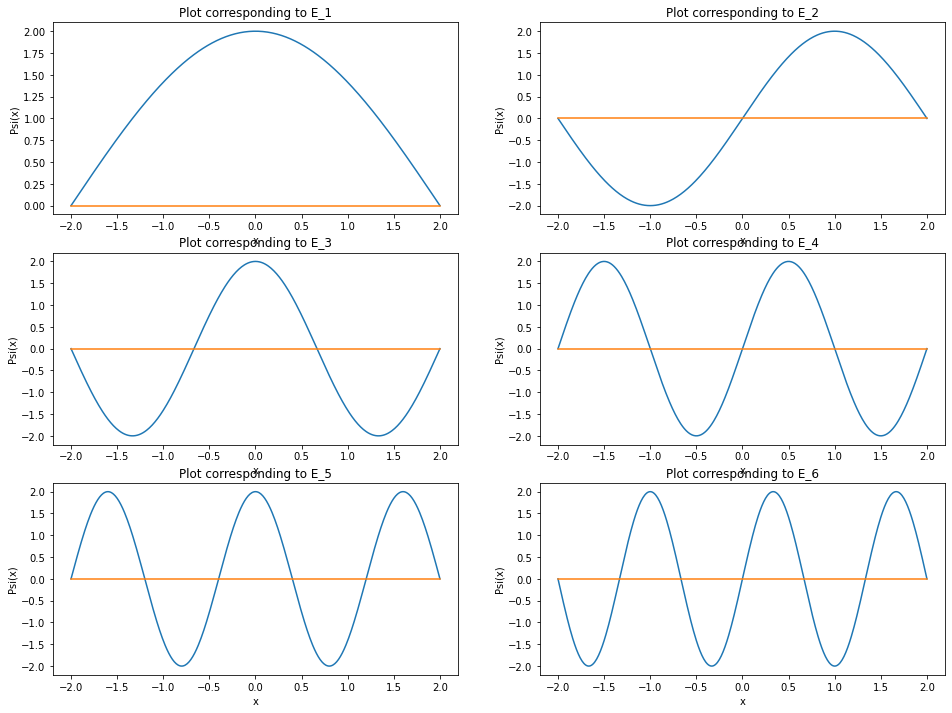

In [ ]:
x = np.linspace(-2, 2, 401)
L = 4
A = 1

fig, ax_array = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
ax_array = ax_array.flatten()

for i, ax in enumerate(ax_array):

    if i % 2 == 0:
        si = 2*A*np.cos(np.sqrt(E_vals_inf[i])*x)
        ax.plot(x, si)
        ax.plot(x, [0]*len(x))
        ax.set_title('Plot corresponding to E_' + str(i+1))
        
    else:
        si = 2*A*np.sin(np.sqrt(E_vals_inf[i])*x)
        ax.plot(x, si)
        ax.plot(x, [0]*len(x))
        ax.set_title('Plot corresponding to E_' + str(i+1))

    ax.set_xlabel('x')
    ax.set_ylabel('Psi(x)')
plt.show()

 # Finite square well Problem

Conditions for Finite square well problem of Schrodinger wave equation

$$\frac{d^2\psi}{dx^2} = -(E+V)\psi$$

$$V(x) = 0,\:\:\: x> \frac{L}{2}, \: x<\frac{-L}{2}$$

$$V(x) = -V,\:\:\:    \frac{-L}{2}< x< \frac{L}{2}$$

Governing equations for Finite square well problem for Schrodinger wave equation
$$\frac{d^2\psi}{dx^2} = (-E+V)\psi$$

$$Let \:\:\:z=\frac{d\psi}{dx}$$

$$\frac{dz}{dx} = -(E+V)\psi$$

Verifying boundary condition
$$\frac{d\psi(\frac{L}{2})}{dx}+k\psi(\frac{+L}{2}) =0 \: where\: k=\sqrt{|E|}$$ 

We know that our solutions are symmetrical and therefore they must be in sinusodal form  when x is in between -L/2 and L/2 as potential is zero.

So we are considereing at x=0 either of the conditions has to work depending on the value of E. We could consider them as initial conditions.

$$\psi(0) = 1 ,\:\:\:\frac{d\psi(0)}{dx} = 0 $$
$$\psi(0) = 0 ,\:\:\:\frac{d\psi(0)}{dx} = 1 $$

Here we are taking L = 4 and V= -10

In [ ]:
def dsi_dx(z):
  return z

def dz_dx(si, E, V):
  return ((-E+V)* si)

def rungeKutta(x0, y0, x, h, z, V, E):
  n = (int)((x - x0)/h)
  si = y0
  for i in range(1, n + 1):
    k1 = h * dsi_dx(z)
    l1 = h * dz_dx(si, E, V)
    k2 = h * dsi_dx(z + (l1/2.0))
    l2 = h * dz_dx(si + (k1/2.0), E, V)
    k3 = h * dsi_dx(z + (l2/2.0))
    l3 = h * dz_dx(si + (k2/2.0), E, V)
    k4 = h * dsi_dx(z + l3)
    l4 = h * dz_dx(si + k3, E, V)
        
    si = si + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
    z = z + (1.0 / 6.0)*(l1 + 2 * l2 + 2 * l3 + l4)
        
    x0 = x0 + h
  #print(si)
  return (si, z)

In [ ]:
x0=0
y0=1
y1=0
h=0.001
x=2
V=-10

In [ ]:
def f(V,E):
  a,b=rungeKutta(x0, y0, x, h, y1, V, E)
  k=np.sqrt(abs(E))
  return (k*a+b)
#termination criteria
e = 10**-6
# note xr is xr_new
def Bisection(xl, xu , xr_old, V):
  xr=(xl + xu)/2
  a=f(V,xr)
  #print(xl,xu, xr,a)
  if (abs((xr - xr_old)/xr) < e):
    return xr
  if (f(V,xl)*f(V,xr) < 0):
    return Bisection(xl, xr, xr, V)
  elif (f(V,xl)*f(V,xr)>0):
    return Bisection(xr, xu, xr, V)
  else:
    if (f(V,xl)==0):
      return xl
    else:
      return xr

In [ ]:
E=Bisection(-10,-9,0, V)
print(E)

-9.541069030761719


In [ ]:
E_vals_finite =[]
for i in range(-10, 10):
  xl=i
  xr=i+1
  V=-10
  x0 = 0
  y0 = 1
  y1= 0
  x = 2      #this has to come from bisection
  h = 0.001
  if (f(V,xl)*f(V,xr)<0):
    E=Bisection(xl,xr,0, V)
    E_vals_finite.append(E)
    print("Cos", str(E))
  y0 = 0
  y1 = 1
  if(f(V,xl)*f(V,xr)<0):
    E=Bisection(xl,xr, 0, V)
    E_vals_finite.append(E)
    print("sin",str(E))

Cos -9.541069030761719
sin -8.176902770996094
Cos -5.953922271728516
sin -2.9989185333251953
Cos -0.013708539307117462
sin 7.803245544433594


Thus, we can plot the function as:

where: 

$k=\sqrt{|E|}$ and $K = \sqrt{-|E|+V}$ 

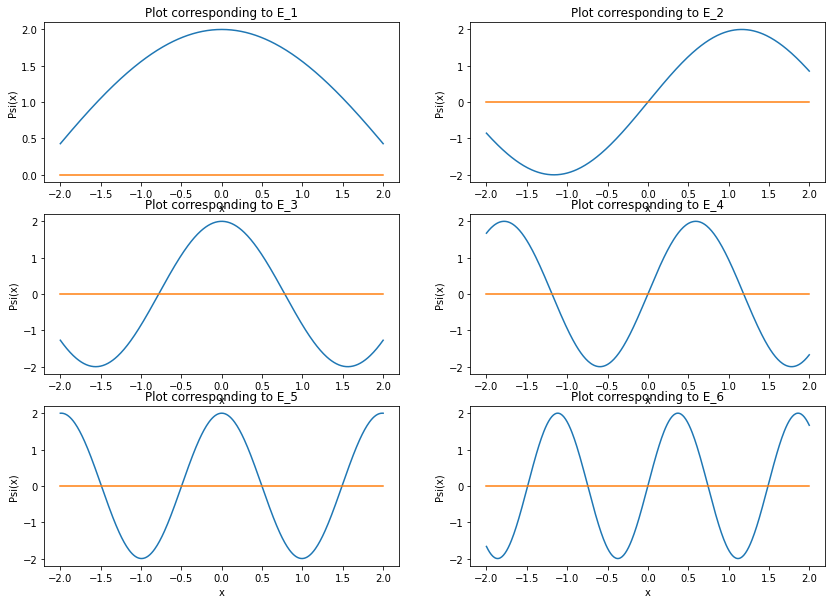

In [ ]:
x = np.linspace(-2, 2, 401)
L = 4
A = 1

fig, ax_array = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
ax_array = ax_array.flatten()

for i, ax in enumerate(ax_array):

    if i % 2 == 0:
        si = 2*A*np.cos(np.sqrt(E_vals_finite[i] - V)*x)
        ax.plot(x, si)
        ax.plot(x, [0]*len(x))
        ax.set_title('Plot corresponding to E_' + str(i+1))
        
    else:
        si = 2*A*np.sin(np.sqrt(E_vals_finite[i] - V)*x)
        ax.plot(x, si)
        ax.plot(x, [0]*len(x))
        ax.set_title('Plot corresponding to E_' + str(i+1))

    ax.set_xlabel('x')
    ax.set_ylabel('Psi(x)')
plt.show()

# Verification using transcendent method

we are using another numerical method to check the results of the above shooting method. 
$$y=xtanx$$

$$y=-xcot(x)$$

$$x^2 + y^2 = (\frac{L}{2})^2V$$
Here we are taking two equations (alternatively (1 and 3 equations), (2and 3 equations)and we will solve them to get the values of x (intersection points).

From those x cordinates of intersection points we will get Eigen values

compare those eigen values with the Shooting method eigen values, they were almost same.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


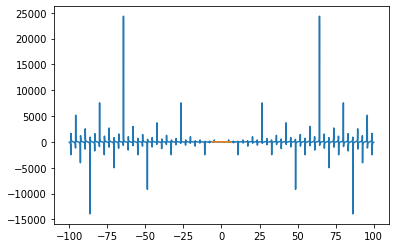

In [ ]:
x = np.linspace(-100, 100, 2001)
y = x*np.tan(x)
y1 = np.sqrt(40 - x**2)
plt.plot(x, y)
plt.plot(x, y1)

In [ ]:
e = 1e-6
def f(x,ValueError,flag):
  if(flag==0):
    return x**2*(1+ np.tan(x)**2) - (L/2)**2*(abs(V))
  return x**2*(1+ (1/np.tan(x))**2) - (L/2)**2*(abs(V))
def Bisection(xl, xu , xr_old, V, flag):
  xr=(xl + xu)/2
  a=f(xr, V, flag)
  #print(xl,xu, xr,a)
  if (abs((xr - xr_old)/xr) < e):
    return xr
  if (f(xl, V, flag)*f(xr, V,flag) < 0):
    return Bisection(xl, xr, xr, V, flag)
  elif (f(xl, V, flag)*f(xr, V, flag)>0):
    return Bisection(xr, xu, xr, V, flag)
  else:
    if (f(xl, V, flag)==0):
      return xl
    else:
      return xr
def get_Eigen_value(x, V):
  return (x/2)**2 +V

In [ ]:
x=Bisection(-2, -1, 0, V,0)
print("Tan", str(get_Eigen_value(x, V)))
x=Bisection(-3, -2, 0, V,1)
print("cot", str(get_Eigen_value(x, V)))
x=Bisection(-5, -4, 0, V,0)
print("Tan", str(get_Eigen_value(x, V)))
x=Bisection(-6, -5, 0, V,1)
print("cot", str(get_Eigen_value(x, V)))
x=Bisection(-7, -6, 0, V,0)
print("Tan", str(get_Eigen_value(x, V)))


Tan -9.124702972603473
cot -8.176898963974054
Tan -5.95393152991528
cot -2.99891663741073
Tan -0.013713849297346314


#Inverse $cosh^2$ potential

Given,
$$ V(x) =\frac{-V_0}{cosh^2(\alpha x)}$$

Now we will make a substitution $\xi=tanh(\alpha x)$

We know that $$\psi(x) = 0,\: x\to\pm\infty$$
Hence $$\psi(\xi) = 0,\: x\to\pm 1$$

Consider two substituitons for the ease of calculations

$$ \epsilon = \sqrt\frac{-E}{\alpha}$$

$$s(s+1) = \frac{V_0}{\alpha^2}$$

Now on subsitituting $\xi$ we get the schrondinger wave equation as follows

$$\frac{d^2\psi}{d\xi^2}=\frac{2\xi}{1-\xi^2}\frac{d\psi}{d\xi} - [ \frac{s(s+1)}{1-\xi^2} -\frac{\epsilon^2}{\alpha(1-\xi^2)^2} ] \psi$$

we use the same initial conditons as before for sin and cos eigen functions and we take V=-10 and h=0.001 

This time we are verifying the right value of e with boundary condition $\psi(1)=0$ or not

In [ ]:
def epsilon(E):      # Epsilon Value      
  return np.sqrt(-1*E/a)

In [ ]:
def energy(e):
  return (-a*(e**2))

In [ ]:
def s(V0, a):   
  return 0.5 * (-1 + np.sqrt(1 + ((4*V0)/(a**2))))

In [ ]:
a = 1.0          # Alpha Value
V0 = 10.0    # It is a positive quantity    
s = s(V0, a)
# s = 2.7015621187164243

In [ ]:
# Here x is the curved E, the substituted value of tanh(alpha*x)
# x varies b/w -1 & 1
def dsi_dx(z):
  return z

def dz_dx(x, si, z, e):
  # Changes Ahead!!! in values of A and B
  A = (2.0*x)/(1-(x**2))                                        #A = 2*(x/(1-(x**2)))
  B = ((s*(s+1))/(1-(x**2))) - ((e**2)/(a*((1-(x**2))**2)))       #B = (s*(s+1)/(1-x**2)) - ((e**2)/(a*((1-x**2)**2)))
  #print(x)
  return ((A*(z)) - (B*(si)))
  

def rungeKutta(x0, y0, x, h, z, e):   # 'e' is the epsilon value
  n = (int)((x - x0)/h)
  x = x0
  si = y0
  for i in range(1, n + 1):
    k1 = h * dsi_dx(z)
    l1 = h * dz_dx(x, si, z, e)
    k2 = h * dsi_dx(z + (l1/2.0))
    l2 = h * dz_dx(x + (h/2.0), si + (k1/2.0), z + (l1/2.0), e)
    k3 = h * dsi_dx(z + (l2/2.0))
    l3 = h * dz_dx(x + (h/2.0), si + (k2/2.0), z + (l2/2.0), e)
    k4 = h * dsi_dx(z + l3)
    l4 = h * dz_dx(x + h, si + k3, z + l3, e)
        
    si = si + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
    z = z + (1.0 / 6.0)*(l1 + 2 * l2 + 2 * l3 + l4)    
    x = x + h

  #print(si)
  return si


In [ ]:
#termination criteria for bisection Method
t = 10**(-6)

In [ ]:
def f(e):
  return (rungeKutta(x0, y0, x, h, y1, e))
  
# note xr is xr_new
def Bisection(xl, xu , xr_old):
  xr=(xl + xu)/2
  #print(xl,xu,xr, f(xr))
  if (abs((xr - xr_old)/xr) <= t):
    return xr

  if (f(epsilon(xl))*f(epsilon(xr)) < 0):
    return Bisection(xl, xr, xr)
  elif (f(epsilon(xl))*f(epsilon(xr)) > 0):
    return Bisection(xr, xu, xr)
  else:
    if (f(xl)==0):
      return xl
    else:
      return xr

In [ ]:
i = -V0
while (i<0):     # As the E values vary from -V0 to 0
  
  xl=i                  # Energy Values
  xr=i+1

  # print(xl,xr,end='\n')
  x0 = 0                # Initial conditions
  y0 = 1
  y1= 0
  x = 1      #this has to come from bisection
  h = 0.001
  if (f(epsilon(xl))*f(epsilon(xr))<0):
    E=Bisection(xl,xr,-1*V0)
    print("Cos", str(E))
  y0 = 0
  y1 = 1
  if (f(epsilon(xl))*f(epsilon(xr))<0):
    E=Bisection(xl,xr, -1*V0)
    print("sin",str(E))

  i = i + 1
  if(i>=0):
    break

Cos -7.298435211181641
sin -2.8953075408935547
Cos -0.4817233085632324
